In [1]:
import pandas as pd 
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore") 

In [3]:
%matplotlib inline

In [4]:
#load excel file
xlsx = 'Customer_Churn_Data_Large.xlsx'
xls = pd.ExcelFile(xlsx)

In [5]:
#loading each sheet
demographics = pd.read_excel(xls,sheet_name='Customer_Demographics')
transactions = pd.read_excel(xls, sheet_name='Transaction_History')
service = pd.read_excel(xls, sheet_name='Customer_Service')
activity = pd.read_excel(xls, sheet_name='Online_Activity')
status = pd.read_excel(xls, sheet_name='Churn_Status')

In [6]:
#merging the sheets on a common column(CustomerId)
df = demographics.merge(transactions, on='CustomerID', how='left')\
                .merge(service, on='CustomerID', how='left')\
                .merge(activity, on='CustomerID', how='left')\
                .merge(status, on='CustomerID', how='left')

### Data Inspection

In [9]:
#checking first 10 rows of the dataframe
df.head(10)

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
5,2,65,M,Married,Low,8903,2022-01-09,285.21,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
6,2,65,M,Married,Low,3527,2022-09-16,311.34,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
7,2,65,M,Married,Low,9279,2022-11-19,199.73,Groceries,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
8,3,18,M,Single,Low,9839,2022-10-08,241.06,Books,9976.0,2022-08-24,Inquiry,Resolved,2023-11-15,3,Website,0
9,3,18,M,Single,Low,7364,2022-08-15,51.07,Clothing,9976.0,2022-08-24,Inquiry,Resolved,2023-11-15,3,Website,0


In [10]:
#displaying dataframe info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   object        
 9   InteractionID     5204 non-null   float64       
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   5204 non-null   object        
 12  ResolutionStatus  5204 non-null   object        
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

In [11]:
#displaying summary statistics of numeric columns
df.describe()

,CustomerID,Age,TransactionID,TransactionDate,AmountSpent,InteractionID,InteractionDate,LastLoginDate,LoginFrequency,ChurnStatus
count,6812.000000,6812.000000,6812.000000,6812,6812.000000,5204.000000,5204,6812,6812.000000,6812.000000
mean,500.169260,43.274516,5497.323253,2022-07-01 02:11:29.136817408,251.620527,5921.861261,2022-07-01 16:31:10.561106944,2023-07-06 04:56:47.633587712,25.724310,0.198473
min,1.000000,18.000000,1000.000000,2022-01-01 00:00:00,5.180000,2015.000000,2022-01-01 00:00:00,2023-01-01 00:00:00,1.000000,0.000000
25%,247.000000,30.000000,3223.500000,2022-04-02 00:00:00,127.100000,3873.250000,2022-04-07 00:00:00,2023-04-12 00:00:00,14.000000,0.000000
50%,505.500000,44.000000,5515.000000,2022-07-01 00:00:00,251.845000,5903.000000,2022-07-02 00:00:00,2023-07-13 00:00:00,26.000000,0.000000
75%,750.000000,56.000000,7675.250000,2022-09-30 00:00:00,375.280000,7851.000000,2022-09-25 00:00:00,2023-10-01 00:00:00,38.000000,0.000000
max,1000.000000,69.000000,9997.000000,2022-12-31 00:00:00,499.860000,9997.000000,2022-12-30 00:00:00,2023-12-31 00:00:00,49.000000,1.000000
std,286.704642,15.286788,2584.768541,NaN,142.901693,2332.331260,NaN,NaN,14.062032,0.398880


### Missing Data Handling

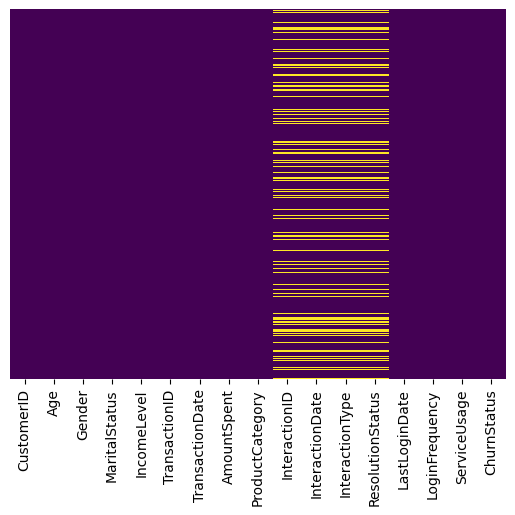

In [12]:
#using heatmap to check for missing values 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [13]:
df.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
MaritalStatus          0
IncomeLevel            0
TransactionID          0
TransactionDate        0
AmountSpent            0
ProductCategory        0
InteractionID       1608
InteractionDate     1608
InteractionType     1608
ResolutionStatus    1608
LastLoginDate          0
LoginFrequency         0
ServiceUsage           0
ChurnStatus            0
dtype: int64

In [14]:
null_rows_any = df[df.isnull().any(axis=1)]
null_rows_any

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
24,5,21,M,Divorced,Medium,1742,2022-02-21,475.69,Groceries,NaN,NaT,NaN,NaN,2023-10-27,41,Website,0
25,5,21,M,Divorced,Medium,9349,2022-08-12,178.91,Furniture,NaN,NaT,NaN,NaN,2023-10-27,41,Website,0
26,5,21,M,Divorced,Medium,7200,2022-12-02,373.51,Groceries,NaN,NaT,NaN,NaN,2023-10-27,41,Website,0
27,5,21,M,Divorced,Medium,4938,2022-10-21,155.76,Electronics,NaN,NaT,NaN,NaN,2023-10-27,41,Website,0
28,5,21,M,Divorced,Medium,5357,2022-07-04,308.80,Electronics,NaN,NaT,NaN,NaN,2023-10-27,41,Website,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,34,M,Widowed,Low,2724,2022-09-08,232.06,Groceries,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6808,1000,34,M,Widowed,Low,2917,2022-12-13,324.98,Books,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6809,1000,34,M,Widowed,Low,2979,2022-06-15,375.34,Groceries,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6810,1000,34,M,Widowed,Low,8594,2022-04-08,166.73,Books,NaN,NaT,NaN,NaN,2023-08-13,22,Mobile App,0


In [15]:
df.drop('InteractionDate',axis=1, inplace =True)

In [16]:
df['InteractionID'].fillna(df['InteractionID'].mode()[0], inplace=True)

In [17]:
#filling the missing value for 'InteractionType' column with 'Unknown'
df['InteractionType'].fillna('Unknown', inplace=True)

In [18]:
#filling the 'ResolutionStatus' column to 'Unknown'
df['ResolutionStatus'].fillna('Unknown',inplace =True)

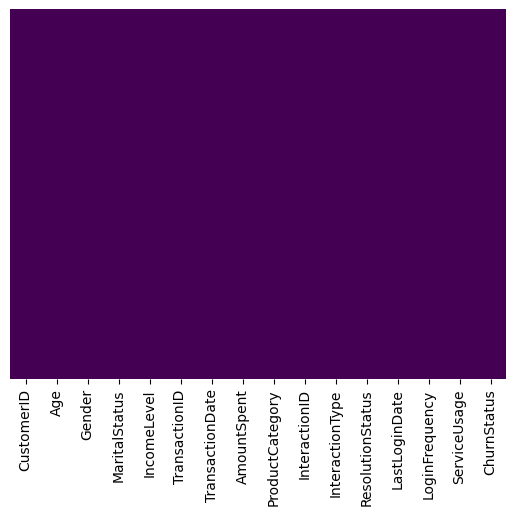

In [19]:
#rechecking if theres any error while handling missing vavlues using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

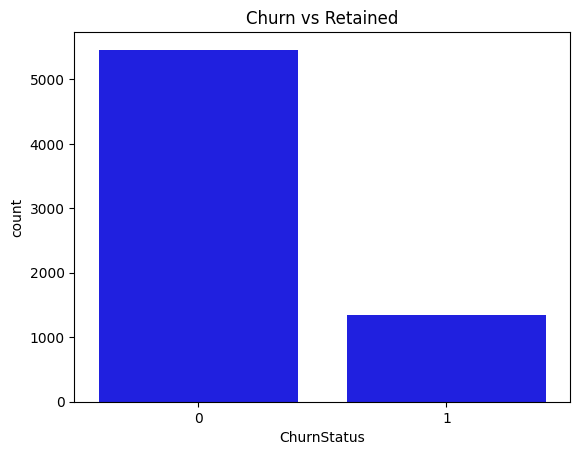

In [20]:
#churn disbution using countplot('Churn vs Retained')
sns.countplot(data=df, x='ChurnStatus',color='blue')
plt.title('Churn vs Retained')
plt.show()

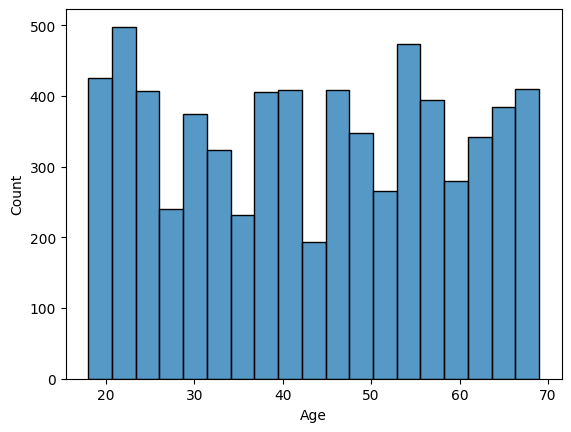

In [21]:
#creating histogram for age
sns.histplot(data=df,x='Age')
plt.show()

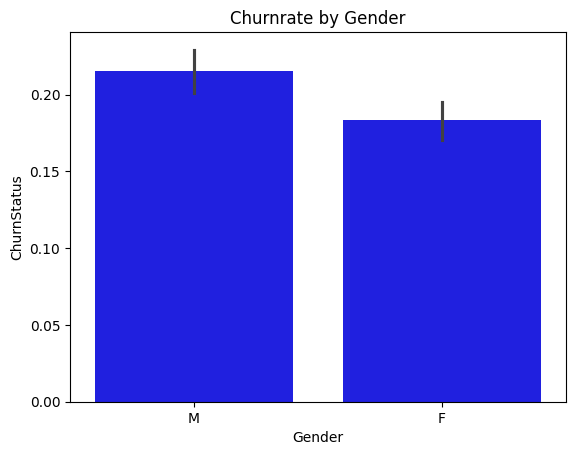

In [22]:
#churn rate by gender
sns.barplot(data=df, x='Gender',y='ChurnStatus',color='blue')
plt.title('Churnrate by Gender')
plt.show()

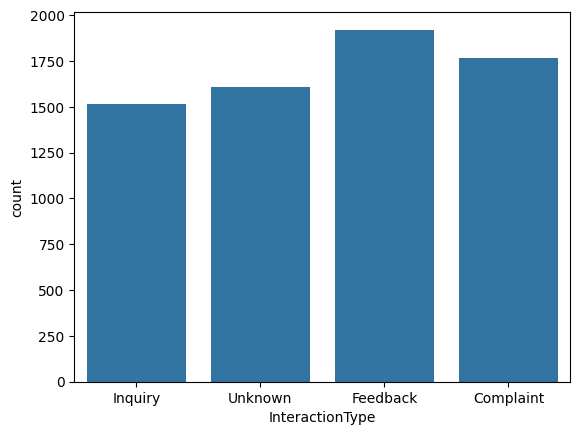

In [23]:
sns.countplot(data=df, x='InteractionType')
plt.show()

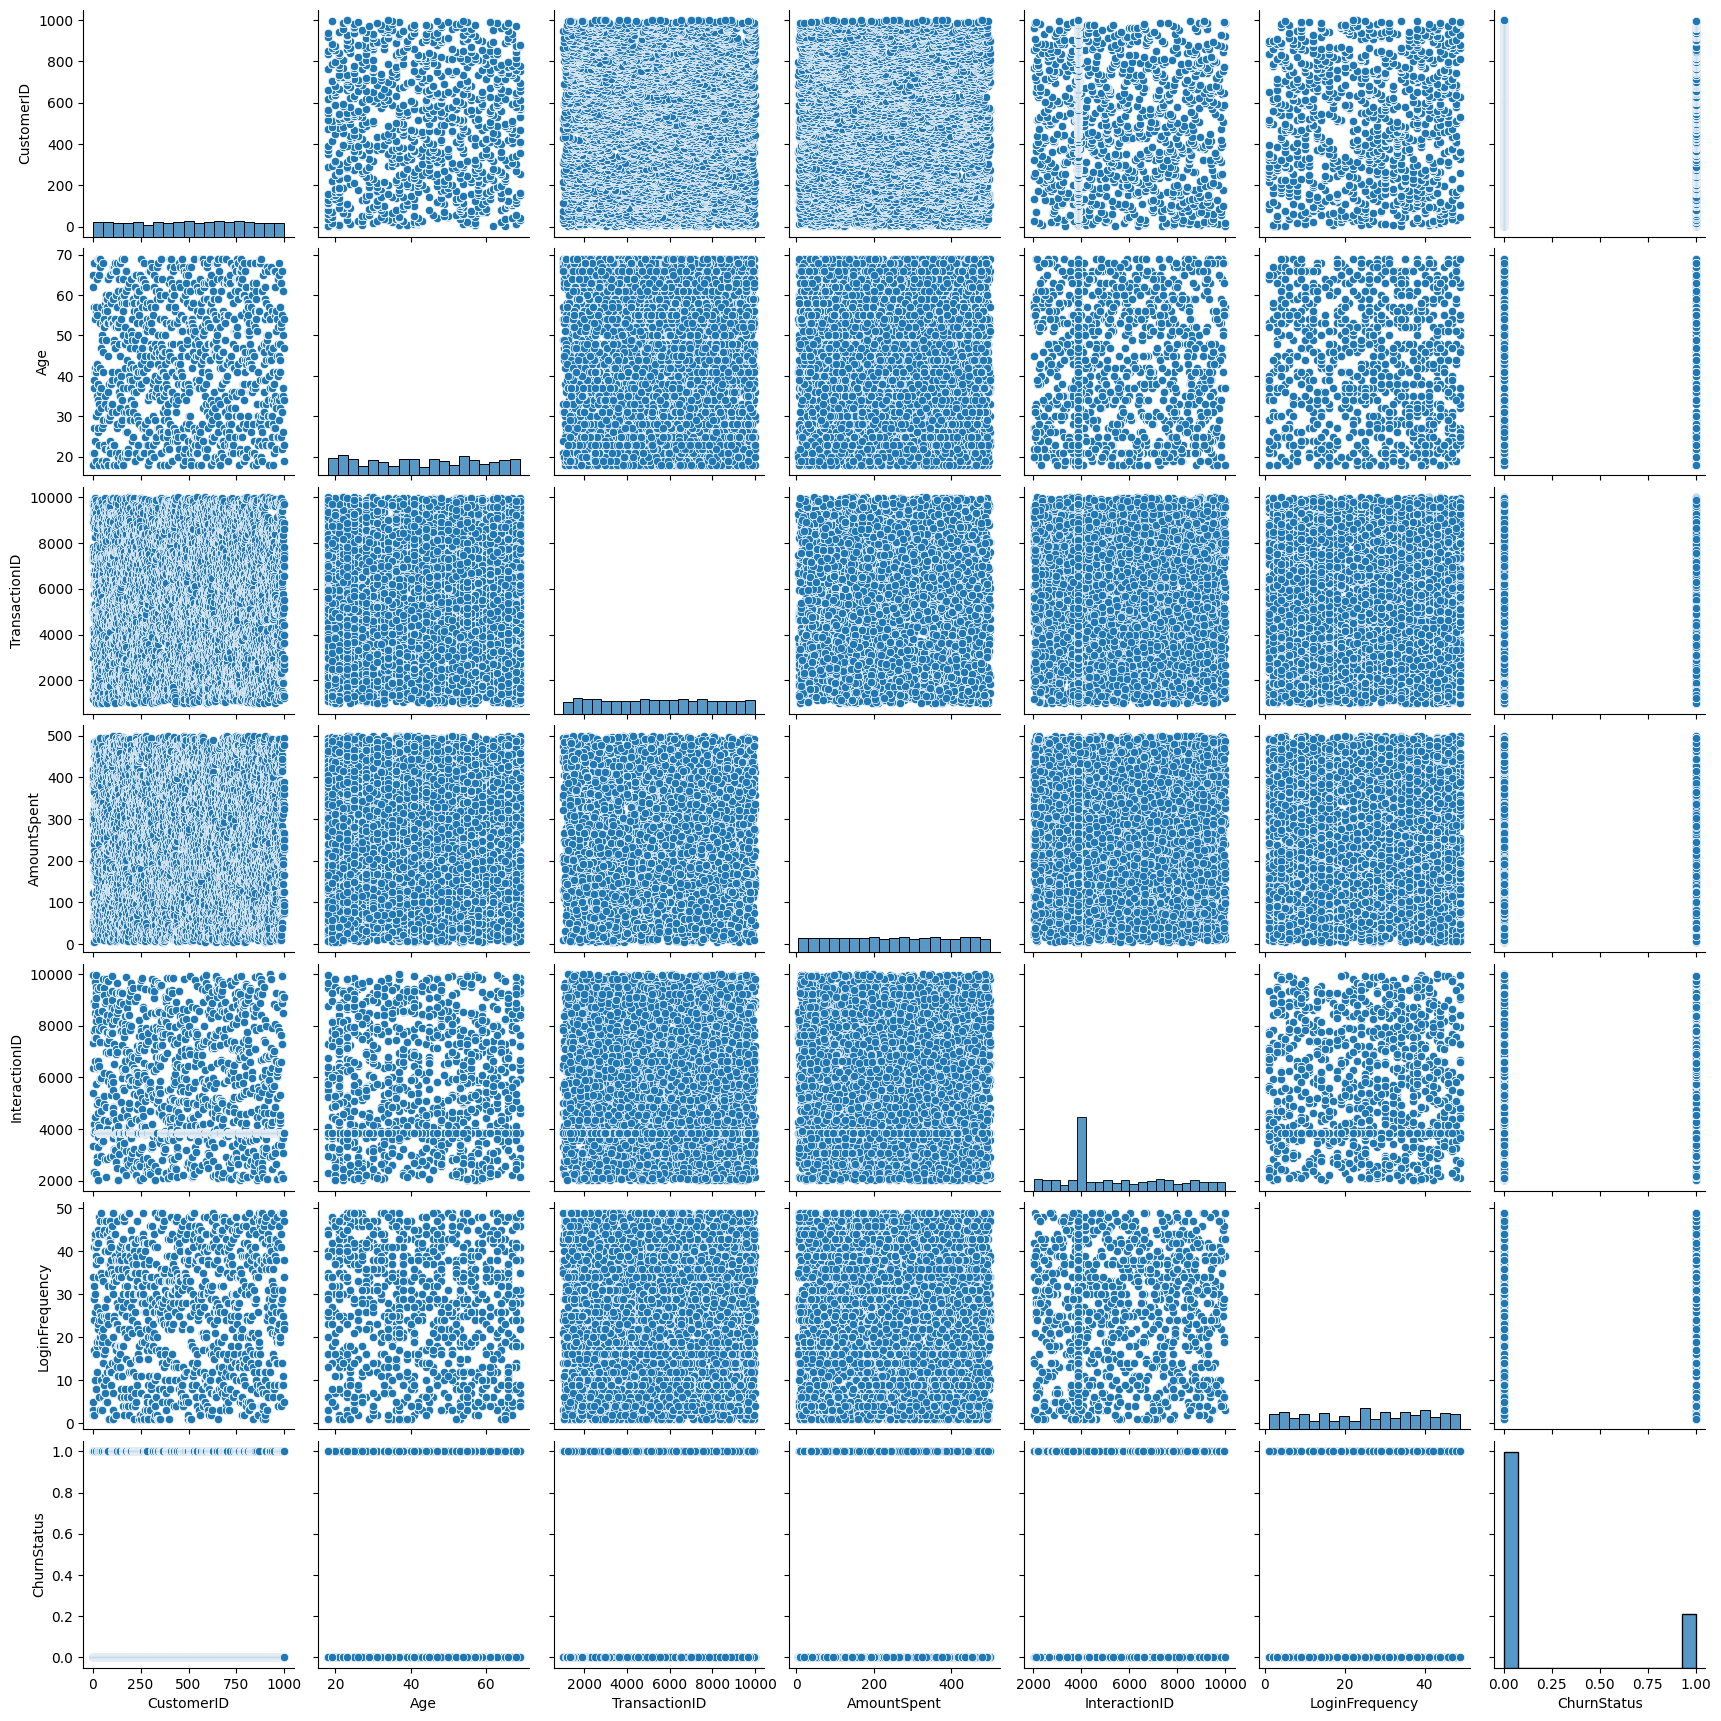

In [24]:
sns.pairplot(df)
plt.show()

In [25]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'TransactionID', 'TransactionDate', 'AmountSpent', 'ProductCategory',
       'InteractionID', 'InteractionType', 'ResolutionStatus', 'LastLoginDate',
       'LoginFrequency', 'ServiceUsage', 'ChurnStatus'],
      dtype='object')

In [26]:
#feature engineering
#extracting date features
df['TransactionYear'] = df['TransactionDate'].dt.year.astype(float)
df['TransactionMonth']= df['TransactionDate'].dt.month.astype(float)
df['TransactionDay']= df['TransactionDate'].dt.day.astype(float)

In [27]:
#feature engineering
#extracting date features
df['LastLoginYear'] = df['LastLoginDate'].dt.year.astype(float)
df['LastLoginMonth']= df['LastLoginDate'].dt.month.astype(float)
df['LastLoginDay']= df['LastLoginDate'].dt.day.astype(float)

In [28]:
df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,...,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,TransactionYear,TransactionMonth,TransactionDay,LastLoginYear,LastLoginMonth,LastLoginDay
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,...,2023-10-21,34,Mobile App,0,2022.0,3.0,27.0,2023.0,10.0,21.0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,...,2023-12-05,5,Website,1,2022.0,8.0,8.0,2023.0,12.0,5.0
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,...,2023-12-05,5,Website,1,2022.0,7.0,25.0,2023.0,12.0,5.0
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,...,2023-12-05,5,Website,1,2022.0,1.0,25.0,2023.0,12.0,5.0
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,...,2023-12-05,5,Website,1,2022.0,7.0,24.0,2023.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,34,M,Widowed,Low,2724,2022-09-08,232.06,Groceries,3852.0,...,2023-08-13,22,Mobile App,0,2022.0,9.0,8.0,2023.0,8.0,13.0
6808,1000,34,M,Widowed,Low,2917,2022-12-13,324.98,Books,3852.0,...,2023-08-13,22,Mobile App,0,2022.0,12.0,13.0,2023.0,8.0,13.0
6809,1000,34,M,Widowed,Low,2979,2022-06-15,375.34,Groceries,3852.0,...,2023-08-13,22,Mobile App,0,2022.0,6.0,15.0,2023.0,8.0,13.0
6810,1000,34,M,Widowed,Low,8594,2022-04-08,166.73,Books,3852.0,...,2023-08-13,22,Mobile App,0,2022.0,4.0,8.0,2023.0,8.0,13.0


In [29]:
categorical_cols=['Gender','MaritalStatus','IncomeLevel','InteractionType','ResolutionStatus','ProductCategory','ServiceUsage']
final_data = pd.get_dummies(df,columns = categorical_cols,dtype=float,drop_first=True)
final_data

,CustomerID,Age,TransactionID,TransactionDate,AmountSpent,InteractionID,LastLoginDate,LoginFrequency,ChurnStatus,TransactionYear,...,InteractionType_Inquiry,InteractionType_Unknown,ResolutionStatus_Unknown,ResolutionStatus_Unresolved,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Groceries,ServiceUsage_Online Banking,ServiceUsage_Website
0,1,62,7194,2022-03-27,416.50,6363.0,2023-10-21,34,0,2022.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,65,7250,2022-08-08,54.96,3329.0,2023-12-05,5,1,2022.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,65,9660,2022-07-25,197.50,3329.0,2023-12-05,5,1,2022.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,65,2998,2022-01-25,101.31,3329.0,2023-12-05,5,1,2022.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2,65,1228,2022-07-24,397.37,3329.0,2023-12-05,5,1,2022.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,34,2724,2022-09-08,232.06,3852.0,2023-08-13,22,0,2022.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6808,1000,34,2917,2022-12-13,324.98,3852.0,2023-08-13,22,0,2022.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6809,1000,34,2979,2022-06-15,375.34,3852.0,2023-08-13,22,0,2022.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6810,1000,34,8594,2022-04-08,166.73,3852.0,2023-08-13,22,0,2022.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
final_data.drop(columns=['TransactionDate','LastLoginDate'], axis=1, inplace=True)

In [31]:
final_data.astype(float)

,CustomerID,Age,TransactionID,AmountSpent,InteractionID,LoginFrequency,ChurnStatus,TransactionYear,TransactionMonth,TransactionDay,...,InteractionType_Inquiry,InteractionType_Unknown,ResolutionStatus_Unknown,ResolutionStatus_Unresolved,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Furniture,ProductCategory_Groceries,ServiceUsage_Online Banking,ServiceUsage_Website
0,1.0,62.0,7194.0,416.50,6363.0,34.0,0.0,2022.0,3.0,27.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,65.0,7250.0,54.96,3329.0,5.0,1.0,2022.0,8.0,8.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,65.0,9660.0,197.50,3329.0,5.0,1.0,2022.0,7.0,25.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,65.0,2998.0,101.31,3329.0,5.0,1.0,2022.0,1.0,25.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,65.0,1228.0,397.37,3329.0,5.0,1.0,2022.0,7.0,24.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000.0,34.0,2724.0,232.06,3852.0,22.0,0.0,2022.0,9.0,8.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6808,1000.0,34.0,2917.0,324.98,3852.0,22.0,0.0,2022.0,12.0,13.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6809,1000.0,34.0,2979.0,375.34,3852.0,22.0,0.0,2022.0,6.0,15.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6810,1000.0,34.0,8594.0,166.73,3852.0,22.0,0.0,2022.0,4.0,8.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split Data to Train_Test_split

In [32]:
#assigning feature and targetted column where X is the feature columns and y is the targeted column
X = final_data.drop(columns=['CustomerID','TransactionID','InteractionID','ChurnStatus'], axis =1).astype(float)
y = final_data['ChurnStatus'].astype(float)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=101)

### Importing Single Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree = DecisionTreeClassifier()

In [36]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
predictions=dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1598   26]
 [  26  394]]


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1624
         1.0       0.94      0.94      0.94       420

    accuracy                           0.97      2044
   macro avg       0.96      0.96      0.96      2044
weighted avg       0.97      0.97      0.97      2044



### Importing Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators = 400)

In [ ]:
rfc.fit(X_train,y_train)

In [41]:
rfc_pred = rfc.predict(X_test)

In [42]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[1624    0]
 [  68  352]]


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1624
         1.0       1.00      0.84      0.91       420

    accuracy                           0.97      2044
   macro avg       0.98      0.92      0.95      2044
weighted avg       0.97      0.97      0.97      2044



In [43]:
#Tuning the classification threshold
#getting prediction probalilites
y_probs = rfc.predict_proba(X_test)[:,1]

#changing threshold from 0.5 to 0.4
y_pred_new =(y_probs >= 0.4).astype(int)
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1624
         1.0       1.00      0.93      0.96       420

    accuracy                           0.98      2044
   macro avg       0.99      0.96      0.98      2044
weighted avg       0.98      0.98      0.98      2044



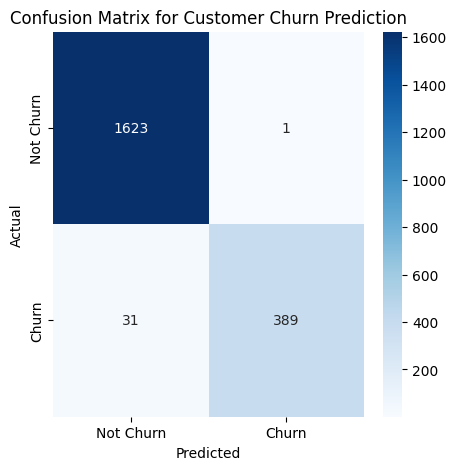

In [44]:
cm = confusion_matrix(y_test, y_pred_new)

# Visualizing the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Customer Churn Prediction')
plt.show()